## Behavioral Risk Factor Surveillance System

#### Installing Dependencies

In [225]:
# Installing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.io as pio
import os


#### Reading the CSV into a DataFrame.

In [249]:
# reading the csv into a dataframe
file_path = "./Resources/behavioral_revised_data_final.csv"
behavior_data = pd.read_csv(file_path)

# Verifying Image directory to store images
if not os.path.exists('Images'):
    os.mkdir('Images')

In [250]:
# Total count of all diseases.
# Preparing DataSet
bp_count = len(behavior_data[behavior_data["Blood Pressure"] == 'Yes'])
diabetes_count = len(behavior_data[(behavior_data["Diabetes"] == "Yes") | (behavior_data["Diabetes"] =="Borderline")])
cancer_count = len(behavior_data[behavior_data["Cancer"] =='Yes'])
chol_count = len(behavior_data[behavior_data["Cholestrol"] == 'Yes'])
heart_count = len(behavior_data[behavior_data["Heart Disease"] == 'Yes'])

#### Age Groups Vs Disease Types

In [251]:
# Calculating the percentages
bp_per = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Age").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Age").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Age").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Age").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Age").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
age_disease_data = pd.DataFrame( {"BP" : bp_per ,"Cancer": cancer_per , 
                                  "Cholestrol" : chol_per, "Heart" : heart_per , "Diabetes" : diabetes_per})
# Formatting the DataFrame
age_disease_data_formatted = age_disease_data.applymap(lambda x: f'{x: .2f}%')
age_disease_data_formatted

,BP,Cancer,Cholestrol,Heart,Diabetes
Age,,,,,
18-24,0.47%,0.12%,0.30%,0.09%,0.31%
25-29,0.90%,0.41%,0.79%,0.29%,0.76%
30-34,1.99%,1.13%,1.74%,0.26%,1.73%
35-39,2.59%,1.54%,2.70%,0.41%,2.72%
40-44,3.17%,1.74%,3.62%,1.22%,3.66%
45-49,4.46%,2.53%,4.94%,1.66%,4.56%
50-54,7.63%,5.43%,8.40%,4.82%,7.74%
55-59,11.48%,8.56%,12.39%,8.22%,11.45%
60-64,14.74%,12.03%,15.27%,12.90%,15.28%


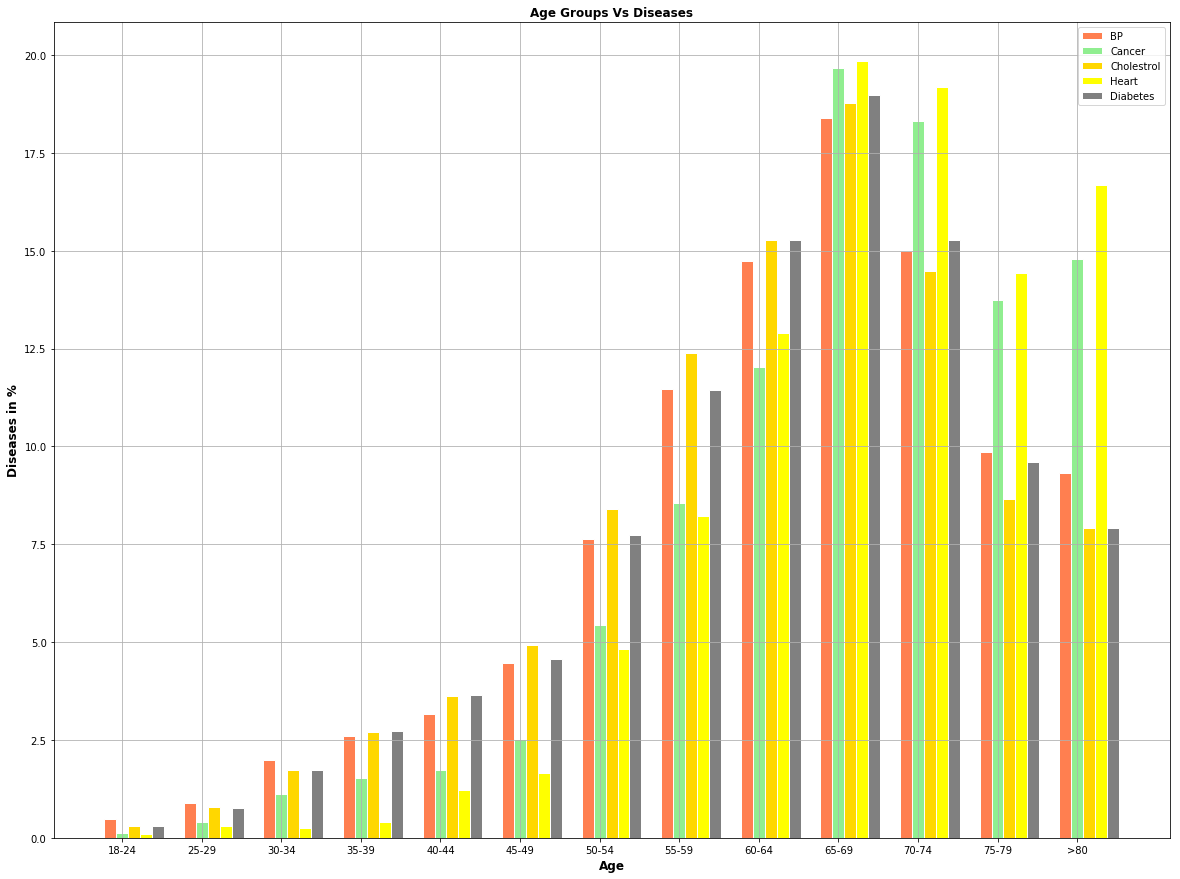

In [252]:
 #Build subplot with three rows and two columns
fig, ax  = plt.subplots(figsize=(20, 15))
#fig, ax = plt.subplots(figsize=(10,7)) 

# set width of bar
bar_width = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(age_disease_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3] 
r5 = [x + bar_width for x in r4]

# Make the plot
plt.bar(r1, age_disease_data["BP"], color='Coral',  width=bar_width, edgecolor='white', label='BP')
plt.bar(r2, age_disease_data["Cancer"], color='lightgreen' , width=bar_width, edgecolor='white', label='Cancer')
plt.bar(r3, age_disease_data["Cholestrol"], color='gold', width=bar_width, edgecolor='white', label='Cholestrol')
plt.bar(r4, age_disease_data["Heart"], color='yellow', width=bar_width, edgecolor='white', label='Heart')
plt.bar(r5, age_disease_data["Diabetes"], color='grey',  width=bar_width, edgecolor='white', label='Diabetes')

# Add xticks on the middle of the group bars
plt.xlabel("Age", fontweight='bold' , fontsize = 'large')
plt.xticks([r + bar_width for r in range(len(age_disease_data))], age_disease_data.index)
plt.title("Age Groups Vs Diseases", fontweight='bold', fontsize='large')
plt.ylabel("Diseases in %", fontweight='bold', fontsize = 'large')
plt.grid()
 
# Create legend & Show graphic
lgnd = plt.legend()

fig.savefig("./Images/age_disease.png")


plt.show()

#### Gender Vs Disease Types

In [253]:
# Calculating the Percentages
bp_per_sex = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Sex").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per_sex = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Sex").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per_sex = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Sex").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per_sex = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Sex").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per_sex = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Sex").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
sex_disease_data = pd.DataFrame( {"BP" : bp_per_sex ,"Cancer": cancer_per_sex , 
                                  "Cholestrol" : chol_per_sex, "Heart" : heart_per_sex , "Diabetes" : diabetes_per_sex})
# Formatting the DataFrame
sex_disease_data_formatted = sex_disease_data.applymap(lambda x: f'{x: .2f}%')
sex_disease_data_formatted

,BP,Cancer,Cholestrol,Heart,Diabetes
Sex,,,,,
Female,41.76%,51.66%,44.54%,26.23%,38.39%
Male,58.24%,48.34%,55.46%,73.77%,61.61%


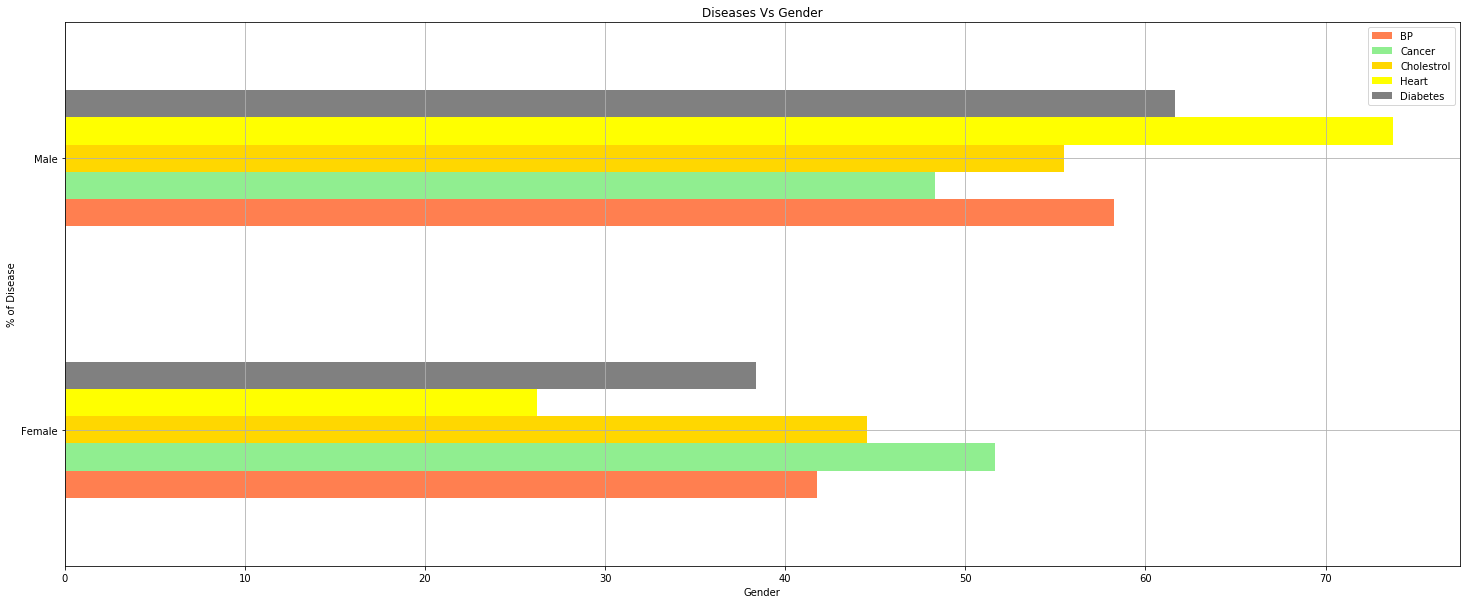

In [254]:
#Plot for Gender Vs Diseases
fig, ax  = plt.subplots(figsize=(25, 10))

sex_disease_data.plot(kind="barh", ax=ax, colors = ["Coral", "lightgreen", "gold", "yellow", "grey"])

plt.title('Diseases Vs Gender')
plt.xlabel('Gender')
plt.ylabel("% of Disease")
plt.grid()


fig.savefig("./Images/gender_disease.png")

plt.show()

#### Impact of Habits on Weight

In [255]:
# Creating the dataset
grouped_data = behavior_data.groupby("State").mean()
fruits_avg_state = grouped_data["Fruits/Day"]
weight_avg_state = grouped_data["Weight(lbs)"]
vegg_avg_state = grouped_data["Vegetables/Day"]
avg_physical_activity = grouped_data["Physical Activity/Day(mints)"]
avg_alcohol = grouped_data["Alcohol/Day"]

* Trend of Fruits and Veggie Consumption on Weight.

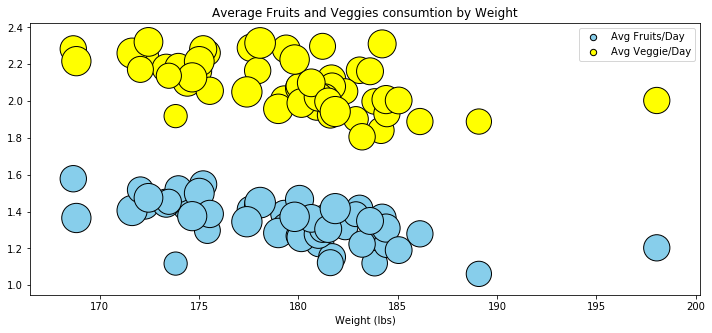

In [256]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = fruits_avg_state 
x = weight_avg_state
y1 = vegg_avg_state
plt.scatter(x,y, s= avg_physical_activity * 10,  marker='o', facecolor='skyblue', edgecolor="black")
plt.scatter( x, y1,  s= avg_physical_activity * 10, marker='o', color='yellow', edgecolor="black")
plt.xlabel("Weight (lbs)")
lgnd = plt.legend(['Avg Fruits/Day', 'Avg Veggie/Day'])
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
plt.title("Average Fruits and Veggies consumtion by Weight")


fig.savefig("./Images/fruit_veggie_wt.png")

plt.show()

* Trend of Physical Activities with Weight

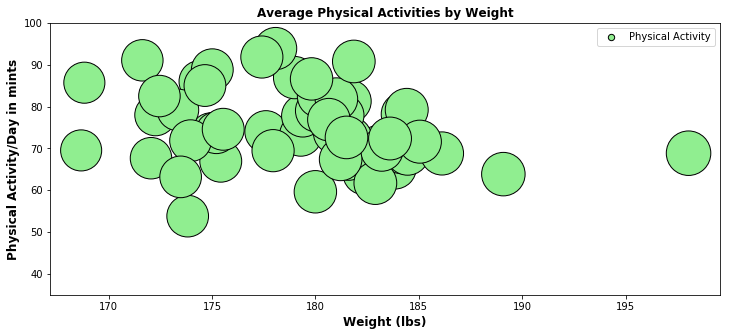

In [258]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = avg_physical_activity
x = weight_avg_state
plt.scatter(x,y,s= weight_avg_state * 10 , marker='o',  facecolors="lightgreen", edgecolors="black" , label = "Physical Activity")

plt.xlabel("Weight (lbs)", fontweight = "bold" , fontsize="large")
plt.ylabel("Physical Activity/Day in mints", fontweight = "bold" , fontsize="large")
plt.title("Average Physical Activities by Weight", fontweight = "bold" , fontsize="large")
plt.ylim(35,100)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
    
fig.savefig("./Images/physical_wt.png")
plt.show()


* Trend of Drinking Habit with Weight

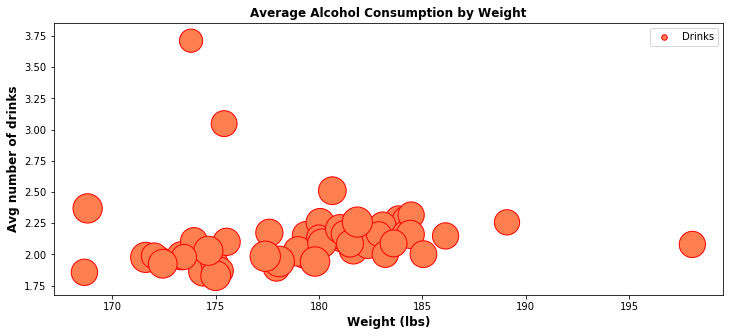

In [259]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = avg_alcohol
x = weight_avg_state
plt.scatter(x,y, s= avg_physical_activity * 10, marker='o',  facecolors="Coral", edgecolors="red" ,label = "Drinks")

plt.xlabel("Weight (lbs)", fontweight="bold", fontsize="large")
plt.ylabel("Avg number of drinks", fontweight="bold", fontsize="large")
# plt.legend(['Avg Physical Activity/Day'])
plt.title("Average Alcohol Consumption by Weight", fontweight="bold", fontsize="large")
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
    
fig.savefig("./Images/alcohol_wt.png")
    
plt.show()

* Trend of Smoking with Weight

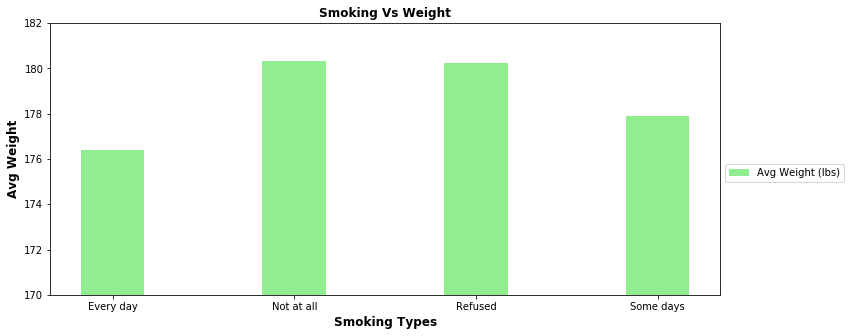

In [260]:
fig, ax  = plt.subplots(figsize=(12, 5))
width = 0.35

grouped_smoking = behavior_data.groupby(["Smoking"]).mean().reset_index().iloc[1:, :2]
grouped_smoking.head()
p1 = plt.bar(  grouped_smoking["Smoking"], grouped_smoking["Weight(lbs)"],  width , color="lightgreen")
plt.legend(["Avg Weight (lbs)"], bbox_to_anchor=(1, 0.5))
plt.ylim(170,182)
plt.xlabel("Smoking Types", fontweight="bold", fontsize="large")
plt.ylabel("Avg Weight", fontweight="bold", fontsize="large")
plt.title("Smoking Vs Weight", fontweight="bold", fontsize="large")

fig.savefig("./Images/smoking_wt.png")
plt.show()

#### Country level Disease percentages based on responses.

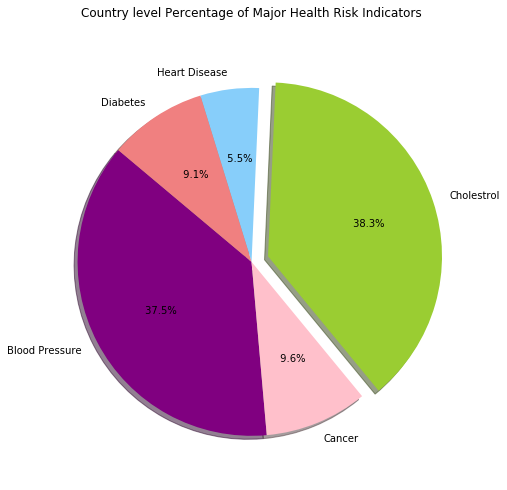

In [261]:
# Gathering Data and plotting Pie chart
fig, ax  = plt.subplots(figsize=(12, 8))

total_respondents = behavior_data.count()[0]

cancer_perc = cancer_count / total_respondents * 100
bp_perc =  bp_count / total_respondents * 100
chol_perc = chol_count / total_respondents * 100
heart_perc = heart_count / total_respondents * 100
diabetes_perc = diabetes_count / total_respondents * 100

disease_perc = [ bp_perc, cancer_perc, chol_perc , heart_perc , diabetes_perc]
pies = ["Blood Pressure" ,"Cancer", "Cholestrol" , "Heart Disease", "Diabetes"]

colors = ["purple","pink","yellowgreen","lightskyblue","lightcoral"]
# colors = ["Coral", "lightgreen", "gold", "yellowgreen", "grey"]

explode = (0,0,0.1,0,0)
          
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(disease_perc, explode=explode, labels=pies, colors=colors, autopct=lambda x: f'{x: .1f}%', shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
# plt.axis("equal")
ttl = plt.title("Country level Percentage of Major Health Risk Indicators")
ttl.set_position([.5, 1.05])

# Save an image of our chart and print the final product to the screen

fig.savefig("./Images/DieseasesPie.png")

plt.show()

In [262]:
# Get imports and set everything up to be working offline.
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [263]:
# Now set up everything so that the figures show up in the notebook:
init_notebook_mode(connected=True) 


In [264]:
# Gathering the data.
state_disease_all = behavior_data.groupby("State Code").count()["Cancer"] + \
                      behavior_data.groupby("State Code").count()["Blood Pressure"] + \
                      behavior_data.groupby("State Code").count()["Cholestrol"] + \
                      behavior_data.groupby("State Code").count()["Heart Disease"] + \
                      behavior_data.groupby("State Code").count()["Diabetes"]

state_disease_yes  = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("State Code").count()["Cancer"] + \
                      behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("State Code").count()["Blood Pressure"] + \
                      behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("State Code").count()["Cholestrol"] + \
                      behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("State Code").count()["Heart Disease"] + \
                      behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("State Code").count()["Diabetes"]

state_disease_perc = round(state_disease_yes / state_disease_all  * 100,2).sort_values()
state_perc_top5 = state_disease_perc.head(10)
state_perc_least5 = state_disease_perc.tail(10)
state_disease_perc = pd.DataFrame(state_disease_perc, columns=["Total Disease %"])
state_disease_perc.head(10)

,Total Disease %
State Code,
GU,17.86
VT,18.41
UT,19.44
CO,19.83
MN,20.26
AK,20.52
MA,20.81
HI,21.05
NY,21.31


In [265]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_least5.index,
            z = state_perc_least5.values,
            locationmode = 'USA-states',
            text = state_perc_least5.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 

In [266]:
# And our layout dictionary with some more arguments:
layout = dict(title = 'Least 10 Healthy States by percentage of reported Diseases (Cancer/ BP/Cholestrol/Heart Disease/Diabetes)',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )

In [267]:
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)

In [268]:
iplot(choromap)
pio.write_image(choromap, './Images/least_healthy_10.png')

In [269]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_top5.index,
            z = state_perc_top5.values,
            locationmode = 'USA-states',
            text = state_perc_top5.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 

In [270]:
# And our layout dictionary with some more arguments:
layout = dict(title = 'Top 10 Healthy States by percentage of reported Diseases (Cancer/ BP/Cholestrol/Heart Disease/Diabetes)',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )

In [271]:
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/top_healthy_10.png')